The goal here is to empirically determine if number of trials going into conditions for GLM (and resulting parameter estimates) is associated with the parameter estimates themselves. I.e., does power bias the parameter estimates themselves, or just increase variance/decrease accuracy?

In [1]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
n_subjects = 1000
mean_correct_value = 100  # across participants
n_total_trials = 216
n_correct_per_subject = np.random.randint(1, n_total_trials, size=n_subjects)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


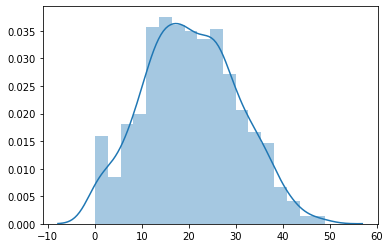

In [3]:
within_variance = stats.norm.rvs(20, 10, size=n_subjects)
# Crop to positive values
within_variance[within_variance < 0.1] = 0.1
sns.distplot(within_variance)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


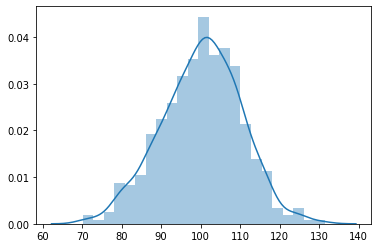

In [4]:
subject_true_means = stats.norm.rvs(mean_correct_value, 10, size=n_subjects)
sns.distplot(subject_true_means)

In [5]:
all_diffs = []
correct_pes = []
incorrect_pes = []
correct_vars = []
incorrect_vars = []

for i_subj in range(n_subjects):
    n_correct = n_correct_per_subject[i_subj]
    n_incorrect = n_total_trials - n_correct
    correct_vals = stats.norm.rvs(
        subject_true_means[i_subj],
        within_variance[i_subj],
        size=n_correct)
    incorrect_vals = stats.norm.rvs(
        subject_true_means[i_subj]+5,  # incorrect has +5
        within_variance[i_subj],
        size=n_incorrect)
    # Set up GLM
    y = np.hstack((correct_vals, incorrect_vals))
    X = np.vstack((
        np.hstack((np.ones(n_correct), np.zeros(n_incorrect))),
        np.hstack((np.zeros(n_correct), np.ones(n_incorrect))),
    )).T
    pes = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # Compile results
    diff = pes[1] - pes[0]
    correct_var = np.var(correct_vals)
    incorrect_var = np.var(incorrect_vals)
    correct_vars.append(correct_var)
    incorrect_vars.append(incorrect_var)
    all_diffs.append(diff)
    correct_pes.append(pes[0])
    incorrect_pes.append(pes[1])

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Correct PE correlation: 0.031635689151121006
Incorrect PE correlation: 0.027739762038607865
Difference PE correlation: -0.009799425761629931


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


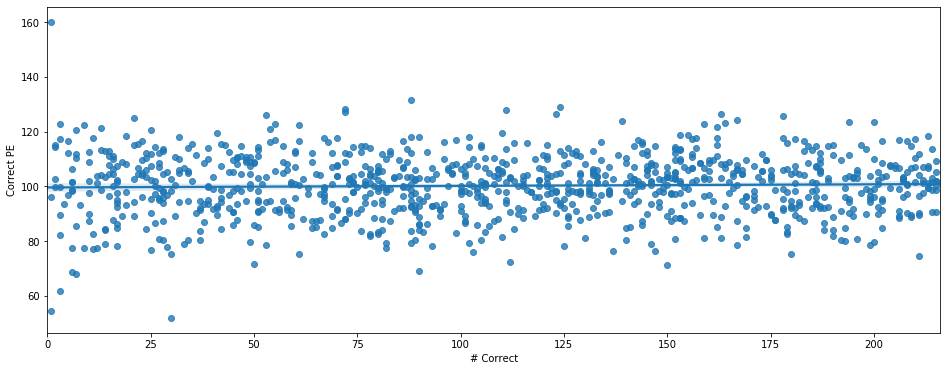

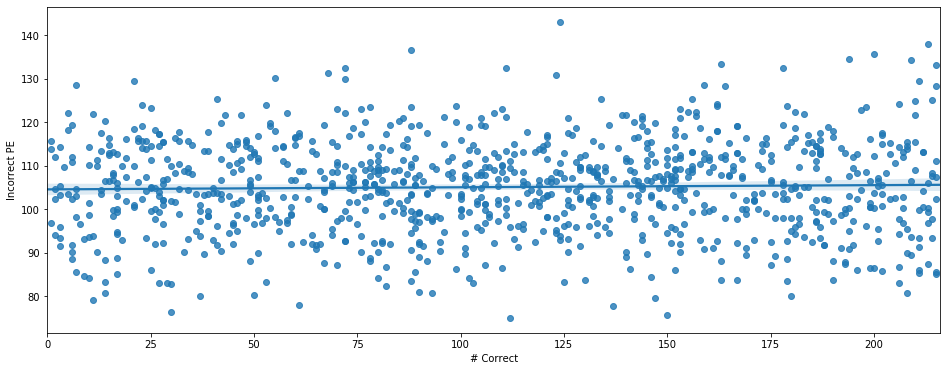

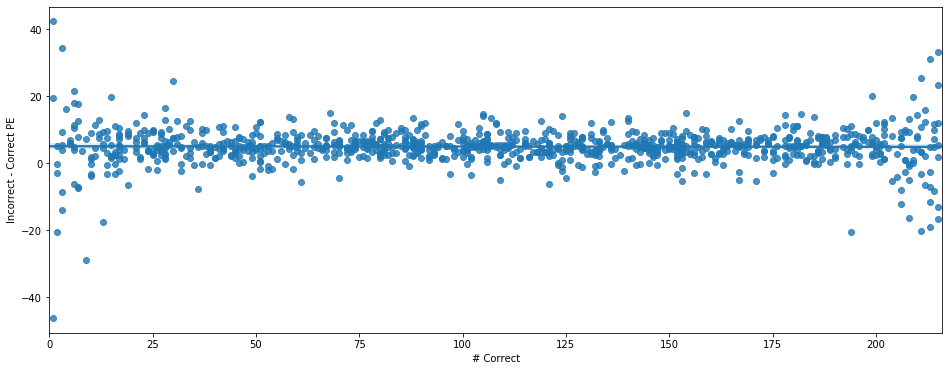

In [6]:
# Summary figures
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, n_total_trials)
sns.regplot(y=correct_pes, x=n_correct_per_subject, ax=ax)
ax.set_xlabel('# Correct')
ax.set_ylabel('Correct PE')
ax.set_xlim(0, n_total_trials)
print('Correct PE correlation: {}'.format(
    np.corrcoef((correct_pes, n_correct_per_subject))[1, 0]))
fig.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, n_total_trials)
sns.regplot(y=incorrect_pes, x=n_correct_per_subject, ax=ax)
ax.set_xlabel('# Correct')
ax.set_ylabel('Incorrect PE')
ax.set_xlim(0, n_total_trials)
print('Incorrect PE correlation: {}'.format(
    np.corrcoef((incorrect_pes, n_correct_per_subject))[1, 0]))
fig.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, n_total_trials)
sns.regplot(y=all_diffs, x=n_correct_per_subject, ax=ax)
ax.set_xlabel('# Correct')
ax.set_ylabel('Incorrect - Correct PE')
ax.set_xlim(0, n_total_trials)
print('Difference PE correlation: {}'.format(
    np.corrcoef((all_diffs, n_correct_per_subject))[1, 0]))
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Correct variance correlation: 0.003919649032776751
Incorrect variance correlation: -0.06248914294532873


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


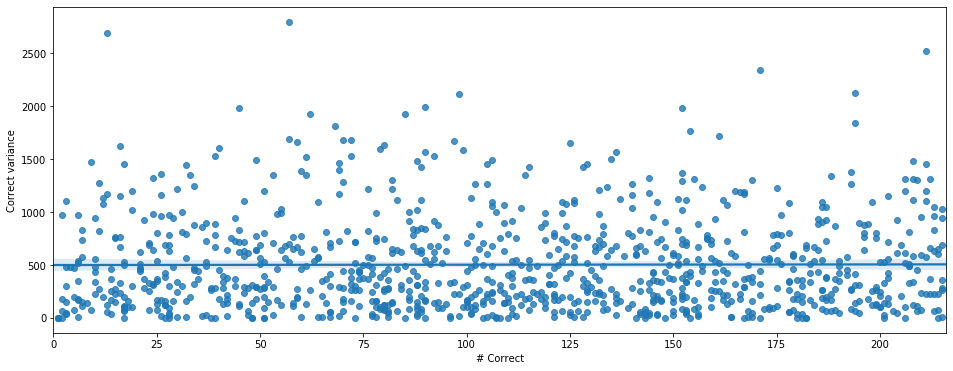

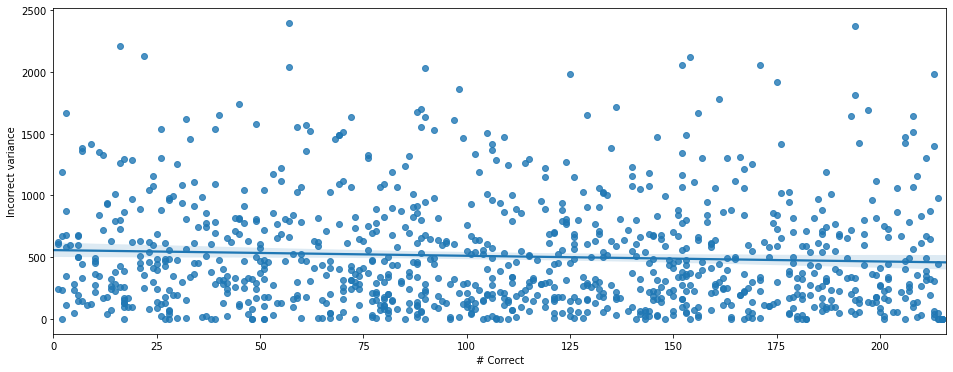

In [7]:
# Summary figures
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, n_total_trials)
sns.regplot(y=correct_vars, x=n_correct_per_subject, ax=ax)
ax.set_xlabel('# Correct')
ax.set_ylabel('Correct variance')
ax.set_xlim(0, n_total_trials)
print('Correct variance correlation: {}'.format(
    np.corrcoef((correct_vars, n_correct_per_subject))[1, 0]))
fig.show()

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(0, n_total_trials)
sns.regplot(y=incorrect_vars, x=n_correct_per_subject, ax=ax)
ax.set_xlabel('# Correct')
ax.set_ylabel('Incorrect variance')
ax.set_xlim(0, n_total_trials)
print('Incorrect variance correlation: {}'.format(
    np.corrcoef((incorrect_vars, n_correct_per_subject))[1, 0]))
fig.show()